<a href="https://colab.research.google.com/github/aidanbolinger/MachineLearning/blob/main/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
          Sales Person    Country              Product       Date   Amount  \
1089  Karlen McCaffrey  Australia  Spicy Special Slims  17-May-22  $4,410    
1090    Jehu Rudeforth        USA           White Choc  07-Jun-22  $6,559    
1091      Ches Bonnell     Canada  Organic Choco Syrup  26-Jul-22    $574    


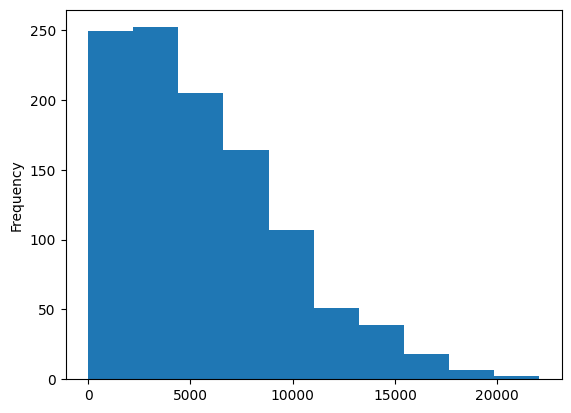

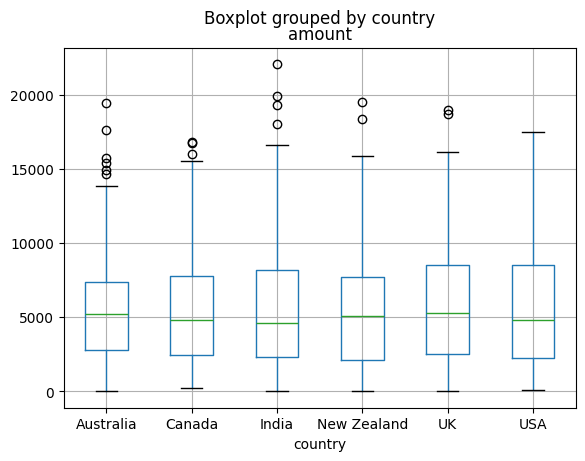

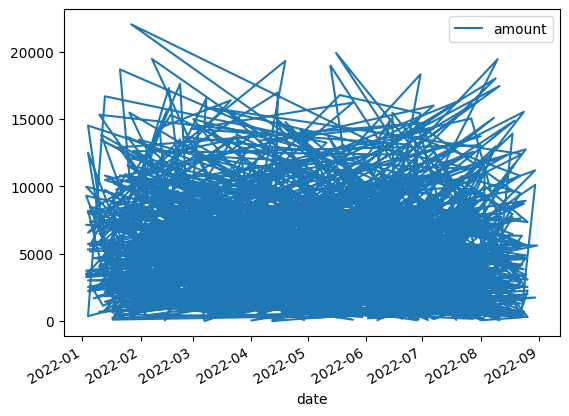

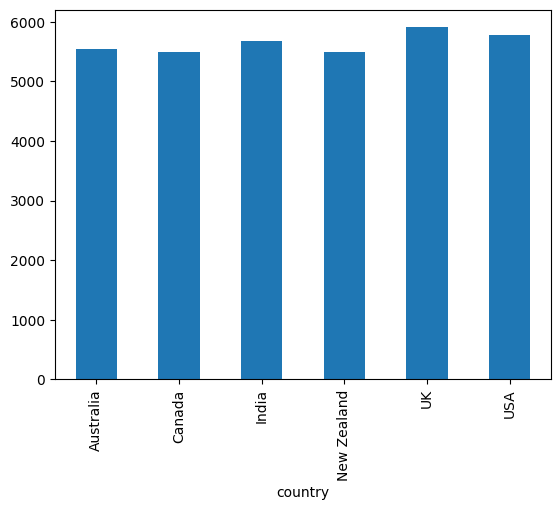

In [13]:
#Load a CSV dataset using Pandas.
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Chocolate Sales.csv')

#Display the first and last 5 rows.
print(df.head())
print(df.tail())

#Get dataset information (.info()) and summary statistics (.describe()).
print(df.info())
print(df.describe())

#Select specific columns from a DataFrame.
selectedColumns = df[["Country", "Amount"]]
print(selectedColumns)

#Filter rows based on a condition.
filteredRows = df[df["Country"] == "USA"]
print(filteredRows)

#Use .loc[] and .iloc[] for selection.
locSelection = df.loc[df["Country"] == "USA"]
print(locSelection)

ilocSelection = df.iloc[0:5]
print(ilocSelection)

#Identify missing values in a dataset.
missingValues = df.isnull().sum()
print(missingValues)

#Fill missing values using mean/median/mode.
df["Boxes Shipped"] = df["Boxes Shipped"].fillna(df["Boxes Shipped"].mean())
print(df)

#Drop rows or columns with too many missing values.
df = df.dropna(thresh=5)
print(df)

#Remove duplicate values.
df = df.drop_duplicates()
print(df)

#Convert data types (e.g., string to datetime).
df["Date"] = pd.to_datetime(df["Date"], format='%d-%b-%y', errors='coerce')
print(df.info())

#Normalize column names (remove spaces, change to lowercase).
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print(df.columns)
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)


#Group data by a categorical column and calculate summary statistics.
groupedData = df.groupby("boxes_shipped").mean(numeric_only=True)
print(groupedData)

#Use .groupby() with functions like sum(), mean(), count()
boxesCount = df.groupby("boxes_shipped").count()
boxesMean = df.groupby("boxes_shipped").mean(numeric_only=True)
boxesSum = df.groupby("boxes_shipped").sum(numeric_only=True)
print(boxesCount)
print(boxesMean)
print(boxesSum)

#Sort the dataset by multiple columns
sortedData = df.sort_values(by=["country", "amount"], ascending=[True, False])
print(sortedData)

#Set and reset indexes for better data handling
df.set_index("country", inplace=True)
print(df)

df.reset_index(inplace=True)
print(df)

#Merge two DataFrames using different join types (inner, outer, left, right)
df1 = df.iloc[0:5]
df2 = df.iloc[5:10]
mergedData1 = pd.merge(df1, df2, on="country", how="inner")
print(mergedData1)

df3 = df.iloc[0:5]
df4 = df.iloc[5:10]
mergedData2 = pd.merge(df3, df4, on="country", how="outer")
print(mergedData2)

df5 = df.iloc[0:5]
df6 = df.iloc[5:10]
mergedData3 = pd.merge(df5, df6, on="country", how="left")
print(mergedData3)

df7 = df.iloc[0:5]
df8 = df.iloc[5:10]
mergedData4 = pd.merge(df7, df8, on="country", how="right")
print(mergedData4)

#Concatenate DataFrames vertically and horizontally
vertConcat = pd.concat([df1, df2], axis=0)
print(vertConcat)

horizConcat = pd.concat([df1, df2], axis=1)
print(horizConcat)

#Generate basic plots (histogram, boxplot, line plot) using .plot()
import matplotlib.pyplot as plt

df["amount"].plot(kind="hist")
plt.show()

df.boxplot(column="amount", by="country")
plt.show()

df.plot(x="date", y="amount", kind="line")
plt.show()

#Use Pandas with Matplotlib for advanced visualizations
df.groupby("country")["amount"].mean().plot(kind="bar")
plt.show()

